In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

### Sieci Neuronowe


Celem tego notebooka będzie przedstawienie najwazniejszych funkcji Pytorcha, które przydadzą się wam zarówno do wykonania zadania jak i do pracy z tą biblioteką w przyszłości. </br>
Pytorch to open-sourcowa biblioteka Pythonowa która na początku funkcjonowała jako wewnętrzne narzędzie firmy Meta, którą postanowiono upublicznić w celu rozpromowania i ułatwienia researchu nad uczeniem głębokim (oraz żeby zrobić konkurencje dla Google'owego TensorFlow).



Ekosystem PyTorcha składa się z kilku modułów:


*   `torch` – podstawowe operacje na tensorach.
*   `torch.nn` – moduły do budowy sieci neuronowych.
*   `torch.optim` – algorytmy optymalizacji.
*   `torch.utils.data` – efektywne ładowanie i przetwarzanie danych.
*   `torchvision` - narzędzia do widzenia komputerowego

Oraz kilka innych elementów jak PyTorch lightning ułatwiających tworzenie wszelkiego rodzaji algorytmów sztucznej inteligencji. </br> </br>
Absolutna podstawą pracy w PyTorchu są tensory - odpowiedniki `np.array` z NumPy, przechowujące dane. Największą zaletą tensorów jest możliwość wykonywania obliczeń na nich na GPU, dlaczego jest to takie użyteczne? Pokażemy to w późniejszej części notatnika jeśli ktoś nie pamięta z wykładu 🙂







## 0. Wstęp - PyTorch

Najprościej myśleć o tensorach jako o macierzach o dowolnej ilości wymiarów.


*   Tensor 0-wymiarowy - skalar
*   Tensor 1-wymiarowy - wektor
*   Tensor 2-wymiarowy - macierz
*   Tensor 3-lub-więcej-wymiarowy - nie znam nazwy ale najczęściej takie tensory reprezentują zdjęcia (wysokość, szerokość, kanały RGB) lub inne wielowymiarowe dane




In [2]:
# przykłady tensorów
skalar = torch.tensor(1)

wektor = torch.tensor([1,2,3])

macierz = torch.tensor([[1,2],[3,4]])

print(skalar,'\n', wektor,'\n', macierz)

tensor(1) 
 tensor([1, 2, 3]) 
 tensor([[1, 2],
        [3, 4]])


Tensory możemy tworzyć na wiele sposobów, przerzucając je z array od NumPy, wypełniając macierze zerami czy jedynkami (w zalezności od potrzeby), czy przydzielajac losowe wartości. Indeksowanie tensorów jest analogiczne do tego jak działa ono w NumPy.

In [3]:
#Przykładowy array
dane = [[1,2],[3,4]]
x_dane = np.array(dane)

#Zmiana na tensory
x_tensor = torch.from_numpy(x_dane)

#Tworzenie sztucznych macierzy
zera = torch.zeros(2,3)
jedynki = torch.ones(2,3)
losowe_liczby = torch.rand(2,3)

print(zera,'\n', jedynki, '\n',losowe_liczby)

tensor([[0., 0., 0.],
        [0., 0., 0.]]) 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 
 tensor([[0.0411, 0.7329, 0.3217],
        [0.3489, 0.1231, 0.5399]])


In [4]:
losowe_liczby.shape

torch.Size([2, 3])

In [5]:
if torch.cuda.is_available():
    x_tensor = x_tensor.to('cuda')


In [6]:
a = torch.tensor([3.0], requires_grad=True)
b = torch.tensor([5.0], requires_grad=True)
Q = 3 * a**3 - b**2
Q.backward()  # oblicza gradienty
print(a.grad) # dQ/da
print(b.grad) # dQ/db


tensor([81.])
tensor([-10.])


### Indeksowanie i Wycinanie Tensorów

Podobnie jak w NumPy, możemy używać indeksowania i wycinania do dostępu do elementów lub podzbiorów tensorów.

In [7]:
tensor = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Dostęp do pojedynczego elementu
print(f"Pojedynczy element: {tensor[0, 0]}\n")

# Wycięcie wiersza
print(f"Wycięcie wiersza: {tensor[1, :]}\n")

# Wycięcie kolumny
print(f"Wycięcie kolumny: {tensor[:, 2]}\n")

# Wycięcie podzbioru
print(f"Wycięcie podzbioru:\n {tensor[0:2, 1:3]}\n")

Pojedynczy element: 1

Wycięcie wiersza: tensor([4, 5, 6])

Wycięcie kolumny: tensor([3, 6, 9])

Wycięcie podzbioru:
 tensor([[2, 3],
        [5, 6]])



### Zmiana Kształtu Tensorów (Reshaping/Viewing)

Często potrzebujemy zmienić kształt tensora bez zmiany jego danych. Możemy to zrobić za pomocą metod `reshape` lub `view`. Metoda `view` działa tylko wtedy, gdy tensor jest ciągły w pamięci.

In [8]:
tensor = torch.arange(9).reshape(3, 3)
print(f"Oryginalny tensor:\n {tensor}\n")

# Zmiana kształtu na wektor
wektor_tensor = tensor.reshape(-1)
print(f"Tensor zmieniony na wektor: {wektor_tensor}\n")

# Zmiana kształtu na inny rozmiar
nowy_ksztalt_tensor = tensor.reshape(9, 1)
print(f"Tensor o nowym kształcie:\n {nowy_ksztalt_tensor}\n")

# Użycie .view() (jeśli możliwe)
widok_tensor = tensor.view(9)
print(f"Widok tensora: {widok_tensor}\n")

Oryginalny tensor:
 tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

Tensor zmieniony na wektor: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])

Tensor o nowym kształcie:
 tensor([[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8]])

Widok tensora: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])



### Łączenie (Concatenating) i Stackowanie (Stacking) Tensorów

Tensory można łączyć wzdłuż istniejącego wymiaru za pomocą `torch.cat` lub tworzyć nowy wymiar za pomocą `torch.stack`.

In [9]:
tensor1 = torch.tensor([[1, 2], [3, 4]])
tensor2 = torch.tensor([[5, 6], [7, 8]])

# Łączenie wzdłuż wierszy (wymiar 0)
concatenated_rows = torch.cat([tensor1, tensor2], dim=0)
print(f"Łączenie wzdłuż wierszy:\n {concatenated_rows}\n")

# Łączenie wzdłuż kolumn (wymiar 1)
concatenated_cols = torch.cat([tensor1, tensor2], dim=1)
print(f"Łączenie wzdłuż kolumn:\n {concatenated_cols}\n")

# Stackowanie (tworzy nowy wymiar na początku domyślnie)
stacked_tensors = torch.stack([tensor1, tensor2])
print(f"Stackowanie:\n {stacked_tensors}\n")

# Stackowanie wzdłuż innego wymiaru
stacked_tensors_dim1 = torch.stack([tensor1, tensor2], dim=1)
print(f"Stackowanie wzdłuż wymiaru 1:\n {stacked_tensors_dim1}\n")

Łączenie wzdłuż wierszy:
 tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])

Łączenie wzdłuż kolumn:
 tensor([[1, 2, 5, 6],
        [3, 4, 7, 8]])

Stackowanie:
 tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])

Stackowanie wzdłuż wymiaru 1:
 tensor([[[1, 2],
         [5, 6]],

        [[3, 4],
         [7, 8]]])



## 1. Sieci Neuronowe

Moduł `torch.nn` jest podstawowym narzędziem w PyTorchu do budowania i trenowania sieci neuronowych. Zamiast implementować każdy element sieci od podstaw, `torch.nn` dostarcza bogaty zestaw gotowych bloków konstrukcyjnych (ang. building blocks). Moduł ten jest kluczowy, ponieważ zawiera definicje standardowych warstw neuronowych (takich jak warstwy liniowe, konwolucyjne), funkcji aktywacji (np. ReLU, Sigmoid), funkcji straty (np. MSELoss, CrossEntropyLoss) oraz narzędzia do zarządzania parametrami modelu i gradientami. Umożliwia to szybsze i bardziej efektywne tworzenie złożonych architektur sieci neuronowych.

### Warstwy

Moduł `torch.nn` oferuje wiele predefiniowanych warstw, które stanowią podstawowe elementy budulcowe sieci neuronowych. Dwie z najczęściej używanych warstw to `Linear` i `Conv2d`.

Warstwa `Linear` (nazywana również warstwą w pełni połączoną lub gęstą) wykonuje transformację liniową danych wejściowych: $y = xA^T + b$. Jest powszechnie używana w końcowych warstwach sieci do mapowania cech na wyniki klasyfikacji lub regresji, a także jako warstwa ukryta w prostszych sieciach.

Warstwa `Conv2d` (warstwa konwolucyjna 2D) jest fundamentalna w sieciach neuronowych do przetwarzania danych o strukturze siatki, takich jak obrazy. Wykonuje operację splotu, ucząc się filtrów, które wykrywają wzorce przestrzenne w danych wejściowych (np. krawędzie, tekstury). Jest kluczowa w większości nowoczesnych architektur do widzenia komputerowego.

In [10]:
# Przykład użycia warstwy Linear
input_features = 10
output_features = 5
batch_size = 64

# Tworzenie przykładowego tensora wejściowego (partia x cechy wejściowe)
linear_input = torch.randn(batch_size, input_features)

# Definiowanie warstwy Linear
linear_layer = torch.nn.Linear(input_features, output_features)

# Przepuszczenie tensora przez warstwę
linear_output = linear_layer(linear_input)

print(f"Kształt tensora wejściowego dla warstwy Linear: {linear_input.shape}")
print(f"Kształt tensora wyjściowego z warstwy Linear: {linear_output.shape}")

Kształt tensora wejściowego dla warstwy Linear: torch.Size([64, 10])
Kształt tensora wyjściowego z warstwy Linear: torch.Size([64, 5])


### Funkcje aktywacji (activation functions)


Funkcje aktywacji odgrywają kluczową rolę w sieciach neuronowych, wprowadzając nieliniowość do modelu. Bez funkcji aktywacji, sieć neuronowa składająca się z wielu warstw liniowych byłaby równoważna pojedynczej warstwie liniowej, co znacznie ograniczyłoby jej zdolność do modelowania złożonych zależności w danych.

Popularne funkcje aktywacji to:

*   **ReLU (Rectified Linear Unit):** $f(x) = \max(0, x)$. Jest to najczęściej używana funkcja aktywacji ze względu na swoją prostotę i efektywność obliczeniową. Pomaga w rozwiązywaniu problemu zanikających gradientów.
*   **Sigmoid:** $f(x) = \frac{1}{1 + e^{-x}}$. Funkcja Sigmoid kompresuje wartości wejściowe do zakresu (0, 1). Była popularna w przeszłości, ale obecnie jest rzadziej używana w ukrytych warstwach ze względu na problem zanikających gradientów dla dużych lub małych wartości wejściowych. Często używana w warstwie wyjściowej do zadań klasyfikacji binarnej.
*   **Softmax:** Stosowana głównie w warstwie wyjściowej do zadań klasyfikacji wieloklasowej. Przekształca wektor wartości rzeczywistych na rozkład prawdopodobieństwa, gdzie suma wszystkich elementów wynosi 1.


In [11]:
import torch.nn.functional as F

# Przykładowy tensor wejściowy
input_tensor = torch.tensor([-2.0, -1.0, 0.0, 1.0, 2.0])

# Użycie funkcji aktywacji
relu_output = F.relu(input_tensor)
sigmoid_output = torch.sigmoid(input_tensor) # Można też użyć torch.nn.functional.sigmoid
softmax_output = F.softmax(input_tensor, dim=0) # dim=0 ponieważ tensor jest 1D

print(f"Tensor wejściowy: {input_tensor}")
print(f"Wynik po ReLU: {relu_output}")
print(f"Wynik po Sigmoid: {sigmoid_output}")
print(f"Wynik po Softmax: {softmax_output}")

# Przykład Softmax na tensorze 2D (np. wyniki z warstwy liniowej dla partii danych)
input_2d = torch.tensor([[-1.0, 0.0, 1.0], [0.0, 1.0, 2.0]])
softmax_output_2d = F.softmax(input_2d, dim=1) # dim=1 dla każdej próbki w partii

print(f"\nTensor wejściowy 2D:\n {input_2d}")
print(f"Wynik po Softmax (dim=1):\n {softmax_output_2d}")

Tensor wejściowy: tensor([-2., -1.,  0.,  1.,  2.])
Wynik po ReLU: tensor([0., 0., 0., 1., 2.])
Wynik po Sigmoid: tensor([0.1192, 0.2689, 0.5000, 0.7311, 0.8808])
Wynik po Softmax: tensor([0.0117, 0.0317, 0.0861, 0.2341, 0.6364])

Tensor wejściowy 2D:
 tensor([[-1.,  0.,  1.],
        [ 0.,  1.,  2.]])
Wynik po Softmax (dim=1):
 tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])


### Funkcje straty (loss functions)

Funkcje straty są kluczowym elementem procesu treningu sieci neuronowych. Mierzą one różnicę między przewidywaniami modelu a rzeczywistymi wartościami docelowymi. Celem treningu jest minimalizacja tej funkcji straty, co oznacza, że model uczy się generować przewidywania coraz bliższe rzeczywistym wartościom.

W zależności od rodzaju zadania (np. regresja, klasyfikacja), stosuje się różne funkcje straty:

*   **MSE (Mean Squared Error):** Stosowana głównie w zadaniach **regresji**. Oblicza średni kwadrat różnicy między przewidywanymi wartościami a wartościami rzeczywistymi. Im mniejsza wartość MSE, tym lepsze dopasowanie modelu do danych. Wzór: $L = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2$, gdzie $y_i$ to wartość rzeczywista, a $\hat{y}_i$ to wartość przewidywana.
*   **CrossEntropyLoss:** Stosowana głównie w zadaniach **klasyfikacji**, zwłaszcza wieloklasowej. Mierzy różnicę między rozkładem prawdopodobieństwa przewidywanym przez model a rzeczywistym rozkładem (reprezentowanym przez etykietę klasy). W PyTorchu `CrossEntropyLoss` jest wygodną kombinacją funkcji Softmax (która przekształca surowe wyniki modelu - logity - na prawdopodobieństwa) i Negative Log Likelihood Loss. Oczekuje logitów jako wejścia i etykiet klas (indeksów) jako celu.


In [12]:

# Przykład użycia MSELoss (dla regresji)

# Przykładowe przewidywane wartości (np. wyjście modelu regresyjnego)
predictions = torch.tensor([1.5, 2.3, 3.1, 4.9, 5.2])

# Przykładowe rzeczywiste wartości (np. prawdziwe wartości docelowe)
targets = torch.tensor([1.0, 2.5, 3.0, 5.0, 5.5])

# Definiowanie funkcji straty MSE
mse_loss = nn.MSELoss()

# Obliczanie straty
loss = mse_loss(predictions, targets)

print(f"Przewidywane wartości: {predictions}")
print(f"Rzeczywiste wartości: {targets}")
print(f"Wartość straty MSE: {loss.item()}")

Przewidywane wartości: tensor([1.5000, 2.3000, 3.1000, 4.9000, 5.2000])
Rzeczywiste wartości: tensor([1.0000, 2.5000, 3.0000, 5.0000, 5.5000])
Wartość straty MSE: 0.08000002801418304


In [13]:

# Przykład użycia CrossEntropyLoss (dla klasyfikacji)

# Przykładowe logity (surowe wyjście sieci neuronowej przed funkcją Softmax)
# Wymiary: partia x liczba klas
logits = torch.tensor([[-0.1, 0.5, -0.3], [1.2, -0.8, 0.1], [-0.5, -0.2, 1.0]])

# Przykładowe etykiety klas (indeksy prawdziwych klas dla każdej próbki w partii)
# Wymiary: partia
# Etykiety powinny być torch.long
labels = torch.tensor([1, 0, 2], dtype=torch.long)

# Definiowanie funkcji straty Cross Entropy
ce_loss = nn.CrossEntropyLoss()

# Obliczanie straty
loss = ce_loss(logits, labels)

print(f"Logity (wyjście modelu):")
print(logits)
print(f"Etykiety klas:")
print(labels)
print(f"Wartość straty Cross Entropy: {loss.item()}")

Logity (wyjście modelu):
tensor([[-0.1000,  0.5000, -0.3000],
        [ 1.2000, -0.8000,  0.1000],
        [-0.5000, -0.2000,  1.0000]])
Etykiety klas:
tensor([1, 0, 2])
Wartość straty Cross Entropy: 0.499269962310791


### Budowa prostej sieci

W PyTorchu, standardowym sposobem definiowania własnych architektur sieci neuronowych jest dziedziczenie po klasie bazowej `torch.nn.Module`. Klasa ta zapewnia funkcjonalność potrzebną do śledzenia parametrów modelu (wag i biasów), zarządzania nimi na różnych urządzeniach (CPU/GPU) oraz automatycznego obliczania gradientów podczas wstecznej propagacji.

Aby zbudować własną sieć neuronową, należy:

1.  **Zdefiniować klasę**, która dziedziczy po `torch.nn.Module`.
2.  W metodzie `__init__` (konstruktorze klasy), **zdefiniować warstwy i inne komponenty** (np. funkcje aktywacji, choć często są one używane bezpośrednio w metodzie `forward`), które będą używane w sieci. Należy zarejestrować te warstwy jako atrybuty klasy, aby `torch.nn.Module` mógł poprawnie zarządzać ich parametrami.
3.  W metodzie `forward`, **zdefiniować przepływ danych** przez sieć. Metoda ta przyjmuje tensor wejściowy i zwraca tensor wyjściowy po przepuszczeniu go przez zdefiniowane warstwy i funkcje aktywacji w odpowiedniej kolejności. To właśnie w tej metodzie realizowana jest logika obliczeniowa sieci.

Poniżej przedstawiamy przykład prostej sieci neuronowej składającej się z kilku warstw liniowych i funkcji aktywacji ReLU.


In [14]:
# 1. Zdefiniuj prostą klasę sieci neuronowej
class SimpleNN(nn.Module):
    # 2. Zdefiniuj warstwy i funkcje aktywacji w __init__
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) # Pierwsza warstwa liniowa
        self.relu = nn.ReLU()                       # Funkcja aktywacji ReLU
        self.fc2 = nn.Linear(hidden_size, output_size) # Druga warstwa liniowa

    # 3. Zaimplementuj przepływ danych w forward
    def forward(self, x):
        x = self.fc1(x)    # Przepuść dane przez pierwszą warstwę liniową
        x = self.relu(x)   # Zastosuj funkcję aktywacji ReLU
        x = self.fc2(x)    # Przepuść dane przez drugą warstwę liniową
        return x

# 4. Utwórz instancję zdefiniowanej klasy sieci neuronowej
input_dim = 10
hidden_dim = 20
output_dim = 5
model = SimpleNN(input_dim, hidden_dim, output_dim)

# 5. Stwórz przykładowy tensor wejściowy
# Przykład: partia 64 próbek, każda z 10 cechami
sample_input = torch.randn(64, input_dim)

# 6. Przepuść przykładowy tensor wejściowy przez zdefiniowaną sieć neuronową
output_tensor = model(sample_input) # Wywołanie instancji klasy uruchamia metodę forward

# 7. Wypisz kształt tensora wyjściowego
print(f"Kształt wejściowego tensora: {sample_input.shape}")
print(f"Kształt wyjściowego tensora z sieci: {output_tensor.shape}")


Kształt wejściowego tensora: torch.Size([64, 10])
Kształt wyjściowego tensora z sieci: torch.Size([64, 5])


### Trening modelu (podstawy)

Trening sieci neuronowej w PyTorchu zazwyczaj obejmuje następujące podstawowe kroki, wykonywane iteracyjnie dla każdej partii danych:

1.  **Forward pass:** W tym kroku dane wejściowe są przepuszczane przez sieć neuronową, aby wygenerować przewidywania modelu (wyjście). Obliczenia przepływają od warstwy wejściowej do warstwy wyjściowej.
2.  **Loss calculation:** Po uzyskaniu przewidywań, obliczana jest wartość funkcji straty (np. `MSELoss` dla regresji, `CrossEntropyLoss` dla klasyfikacji). Funkcja straty kwantyfikuje, jak bardzo przewidywania modelu różnią się od rzeczywistych etykiet docelowych.
3.  **Backward pass:** To kluczowy krok, w którym PyTorch oblicza gradienty funkcji straty względem wszystkich parametrów modelu (wag i biasów). Dzieje się to dzięki mechanizmowi automatycznego różniczkowania PyTorcha. Wywołanie metody `.backward()` na tensorze reprezentującym wartość funkcji straty inicjuje ten proces. Gradienty wskazują kierunek i siłę, w jakiej należy zmienić parametry, aby zminimalizować stratę.
4.  **Optimizer step:** Na koniec, wybrany algorytm optymalizacji (np. SGD, Adam) wykorzystuje obliczone gradienty do aktualizacji parametrów modelu. Celem optymalizatora jest znalezienie zbioru parametrów, który minimalizuje funkcję straty na danych treningowych. Metoda `optimizer.step()` wykonuje tę aktualizację.

Rola optymalizatora i metody `.backward()` jest fundamentalna. Metoda `.backward()` dostarcza niezbędnych informacji (gradientów) o tym, jak zmienić parametry, podczas gdy optymalizator wykorzystuje te informacje do faktycznej modyfikacji parametrów w celu stopniowego poprawiania wydajności modelu.

### Tworzenie datasetów i dataloaderów

Efektywne ładowanie i przetwarzanie danych jest kluczowe podczas trenowania modeli uczenia głębokiego, zwłaszcza przy dużych zbiorach danych. PyTorch dostarcza dwa podstawowe narzędzia do tego celu: `torch.utils.data.Dataset` i `torch.utils.data.DataLoader`.

### Klasa `Dataset`

Klasa `Dataset` reprezentuje zbiór danych. Własna klasa `Dataset` powinna dziedziczyć po `torch.utils.data.Dataset` i implementować dwie kluczowe metody:

*   `__len__(self)`: Powinna zwracać całkowity rozmiar zbioru danych.
*   `__getitem__(self, idx)`: Powinna zwracać pojedynczą próbkę danych (np. para cechy-etykieta) dla danego indeksu `idx`.

Implementując te dwie metody, tworzymy obiekt, który można indeksować jak listę (`dataset[i]`) i który zna swój rozmiar (`len(dataset)`). Klasa `Dataset` odpowiada za logikę pobierania pojedynczych próbek danych z ich źródła (np. pliki na dysku, baza danych).

### Klasa `DataLoader`

Klasa `DataLoader` jest iteratorem, który opakowuje obiekt `Dataset` i zapewnia wygodny sposób na dostęp do danych w partiach (mini-batchach). Automatyzuje takie procesy jak:

*   **Partiowanie (Batching):** Grupowanie pojedynczych próbek w partie.
*   **Mieszanie (Shuffling):** Opcjonalne mieszanie danych w każdej epoce, co jest ważne dla stabilności treningu.
*   **Równoległe ładowanie (Parallel loading):** Ładowanie danych w wielu procesach roboczych, aby przyspieszyć proces I/O i zapobiec wąskiemu gardłu w treningu.

Kluczowe argumenty `DataLoader` to:

*   `dataset`: Obiekt klasy `Dataset`, z którego będą pobierane dane.
*   `batch_size`: Liczba próbek w każdej partii.
*   `shuffle`: Jeśli `True`, dane będą mieszane w każdej epoce.

### Customowa funkcja `collate_fn`

Domyślnie `DataLoader` próbuje automatycznie łączyć próbki w partię. Działa to dobrze, gdy próbki mają identyczny kształt (np. obrazy o tym samym rozmiarze). Jednak w przypadku danych o różnych rozmiarach (np. sekwencje tekstowe o różnej długości, grafy o różnej liczbie węzłów), standardowy mechanizm łączenia może zawieść.

W takich sytuacjach można zdefiniować własną funkcję `collate_fn` i przekazać ją do `DataLoader`. Ta funkcja przyjmuje listę próbek zwróconych przez `dataset.__getitem__` dla danej partii i jest odpowiedzialna za ich odpowiednie przetworzenie i połączenie w jeden lub więcej tensorów, które będą reprezentować partię danych. Przykładowo, `collate_fn` może dodawać wypełnienie (padding) do sekwencji o różnej długości, aby miały ten sam rozmiar przed połączeniem w tensor.


In [ ]:
class SimpleCustomDataset(Dataset):
    def __init__(self, data, labels):
        # Sprawdzenie, czy długości danych i etykiet są zgodne
        if len(data) != len(labels):
            raise ValueError("Data and labels must have the same length")
        self.data = data
        self.labels = labels

    def __len__(self):
        # Zwraca całkowity rozmiar zbioru danych
        return len(self.data)

    def __getitem__(self, idx):
        # Zwraca pojedynczą próbkę danych i jej etykietę dla danego indeksu
        # Zakładamy, że dane i etykiety są już tensorami lub listami, które można łatwo przekonwertować
        sample = self.data[idx]
        label = self.labels[idx]
        # Konwersja na tensory PyTorch (jeśli nie są już tensorami)
        if not isinstance(sample, torch.Tensor):
            sample = torch.tensor(sample, dtype=torch.float32)
        if not isinstance(label, torch.Tensor):
            label = torch.tensor(label, dtype=torch.long) # Etykiety klas zazwyczaj są typu long

        return sample, label

# Przykładowe dane i etykiety
sample_data = [[1.0, 2.0], [3.0, 4.0], [5.0, 6.0], [7.0, 8.0], [9.0, 10.0], [11.0, 12.0]]
sample_labels = [0, 1, 0, 1, 0, 1]

# Utworzenie instancji customowej klasy Dataset
custom_dataset = SimpleCustomDataset(sample_data, sample_labels)

# Demonstracja dostępu do elementów i rozmiaru
print(f"Rozmiar zbioru danych: {len(custom_dataset)}")
print(f"Pierwsza próbka: {custom_dataset[0]}")
print(f"Trzecia próbka: {custom_dataset[2]}")


Rozmiar zbioru danych: 6
Pierwsza próbka: (tensor([1., 2.]), tensor(0))
Trzecia próbka: (tensor([5., 6.]), tensor(0))


In [16]:
# Użycie DataLoader z customowym zbiorem danych
batch_size = 2
dataloader = DataLoader(custom_dataset, batch_size=batch_size, shuffle=True)

print(f"\nDemonstracja iteracji po DataLoaderze z batch_size={batch_size}:")
# Iteracja po DataLoaderze
for i, (batch_samples, batch_labels) in enumerate(dataloader):
    print(f"Numer partii: {i+1}")
    print(f"Kształt partii danych: {batch_samples.shape}")
    print(f"Kształt partii etykiet: {batch_labels.shape}")
    print(f"Przykładowa partia danych:\n{batch_samples}")
    print(f"Przykładowa partia etykiet:\n{batch_labels}")
    if i == 2: # Wypiszmy tylko kilka partii dla przykładu
        break



Demonstracja iteracji po DataLoaderze z batch_size=2:
Numer partii: 1
Kształt partii danych: torch.Size([2, 2])
Kształt partii etykiet: torch.Size([2])
Przykładowa partia danych:
tensor([[ 7.,  8.],
        [ 9., 10.]])
Przykładowa partia etykiet:
tensor([1, 0])
Numer partii: 2
Kształt partii danych: torch.Size([2, 2])
Kształt partii etykiet: torch.Size([2])
Przykładowa partia danych:
tensor([[11., 12.],
        [ 5.,  6.]])
Przykładowa partia etykiet:
tensor([1, 0])
Numer partii: 3
Kształt partii danych: torch.Size([2, 2])
Kształt partii etykiet: torch.Size([2])
Przykładowa partia danych:
tensor([[3., 4.],
        [1., 2.]])
Przykładowa partia etykiet:
tensor([1, 0])


In [17]:
def custom_collate(batch):
    """
    Custom collate function to demonstrate combining samples into a batch.
    This function simply stacks the tensors for data and labels.
    In a real-world scenario, this would handle variable-sized data (e.g., padding).

    Args:
        batch (list): A list of samples returned by the Dataset's __getitem__.
                      Each sample is a tuple (data, label).

    Returns:
        tuple: A tuple containing stacked data tensors and stacked label tensors.
               (batch_data, batch_labels)
    """
    # batch is a list of tuples: [(sample1, label1), (sample2, label2), ...]
    # Separate data and labels into two lists
    data_list = [item[0] for item in batch]
    label_list = [item[1] for item in batch]

    # Stack the tensors along a new dimension (usually the batch dimension)
    # torch.stack creates a new dimension at dim=0 by default
    batch_data = torch.stack(data_list)
    batch_labels = torch.stack(label_list)

    return batch_data, batch_labels

print("Zdefiniowano customową funkcję collate_fn.")


Zdefiniowano customową funkcję collate_fn.


In [18]:
# Użycie DataLoader z customową funkcją collate_fn
batch_size = 3 # Użyjmy innego rozmiaru partii
dataloader_with_collate = DataLoader(custom_dataset, batch_size=batch_size, shuffle=False, collate_fn=custom_collate) # shuffle=False dla powtarzalności

print(f"\nDemonstracja iteracji po DataLoaderze z customową funkcją collate_fn i batch_size={batch_size}:")
# Iteracja po DataLoaderze z custom collate_fn
for i, (batch_samples, batch_labels) in enumerate(dataloader_with_collate):
    print(f"Numer partii: {i+1}")
    print(f"Kształt partii danych: {batch_samples.shape}")
    print(f"Kształt partii etykiet: {batch_labels.shape}")
    print(f"Przykładowa partia danych:\n{batch_samples}")
    print(f"Przykładowa partia etykiet:\n{batch_labels}")
    if i == 1: # Wypiszmy tylko kilka partii dla przykładu
        break


Demonstracja iteracji po DataLoaderze z customową funkcją collate_fn i batch_size=3:
Numer partii: 1
Kształt partii danych: torch.Size([3, 2])
Kształt partii etykiet: torch.Size([3])
Przykładowa partia danych:
tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
Przykładowa partia etykiet:
tensor([0, 1, 0])
Numer partii: 2
Kształt partii danych: torch.Size([3, 2])
Kształt partii etykiet: torch.Size([3])
Przykładowa partia danych:
tensor([[ 7.,  8.],
        [ 9., 10.],
        [11., 12.]])
Przykładowa partia etykiet:
tensor([1, 0, 1])


### Zapisywanie i wczytywanie modeli


Po wytrenowaniu modelu neuronowego, kluczowe jest możliwość jego zapisania na dysku, aby można go było później wczytać i ponownie użyć (np. do wnioskowania na nowych danych, dalszego treningu lub udostępnienia innym). PyTorch oferuje elastyczne mechanizmy do zapisywania i wczytywania modeli.

Istnieją dwie główne metody zapisywania modeli w PyTorchu:

1.  **Zapisywanie samego słownika stanu (state_dict):** Jest to zalecana metoda. `state_dict` to słownik Pythonowy, który mapuje każdą warstwę na jej tensory parametrów (wagi i bias). Zapisując tylko `state_dict`, zapisujemy tylko *nauczone parametry* modelu, a nie całą jego architekturę. Aby wczytać model w ten sposób, musimy najpierw zdefiniować (lub mieć dostęp do) klasy modelu z identyczną architekturą, a następnie wczytać do niej `state_dict`.
2.  **Zapisywanie całego modelu:** Ta metoda zapisuje całą architekturę modelu *wraz* z jego parametrami. Choć może wydawać się wygodniejsza, ma wady, takie jak sztywność (trudniej modyfikować model po wczytaniu) i potencjalne problemy z kompatybilnością między różnymi wersjami PyTorcha lub jeśli kod definiujący model nie jest dostępny. Z tego powodu zazwyczaj preferuje się zapisywanie i wczytywanie samego `state_dict`.

Poniżej pokażemy, jak zapisać i wczytać model, koncentrując się na zalecanej metodzie z użyciem `state_dict`.

In [19]:
import torch
import torch.nn as nn
import os # Import os to manage file paths


class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

input_dim = 10
hidden_dim = 20
output_dim = 5
model_to_save = SimpleNN(input_dim, hidden_dim, output_dim)

# Define the path to save the state dictionary
model_save_path = 'simple_nn_state_dict.pth'

# Save the state dictionary
torch.save(model_to_save.state_dict(), model_save_path)

print(f"Model state dictionary saved to: {model_save_path}")
print(f"File exists: {os.path.exists(model_save_path)}")

Model state dictionary saved to: simple_nn_state_dict.pth
File exists: True


In [20]:
# Create a new instance of the model with the same architecture
model_to_load = SimpleNN(input_dim, hidden_dim, output_dim)

# Define the path to the saved state dictionary
model_load_path = 'simple_nn_state_dict.pth'

# Load the state dictionary
state_dict = torch.load(model_load_path)

# Load the state dictionary into the new model instance
model_to_load.load_state_dict(state_dict)

# Set the model to evaluation mode (important if you are going to use it for inference)
model_to_load.eval()

print(f"Model state dictionary loaded from: {model_load_path}")
print("Model is ready for use.")

# Optional: Verify weights (e.g., compare weights of the first layer)
# print("Weights of the first layer after loading:")
# print(model_to_load.fc1.weight)

Model state dictionary loaded from: simple_nn_state_dict.pth
Model is ready for use.


Choć zalecaną metodą jest zapisywanie i wczytywanie tylko słownika stanu (`state_dict`), PyTorch umożliwia również zapisanie całego obiektu modelu, który zawiera zarówno architekturę, jak i nauczone parametry. Robi się to po prostu przekazując cały obiekt modelu do funkcji `torch.save()`.

```python
# Przykład zapisania całego modelu
# model_to_save to instancja naszej klasy SimpleNN
torch.save(model_to_save, 'simple_nn_full_model.pth')
print("Cały model zapisany do: simple_nn_full_model.pth")
```

Aby wczytać cały model, używamy funkcji `torch.load()`:

```python
# Przykład wczytania całego modelu
loaded_full_model = torch.load('simple_nn_full_model.pth')
loaded_full_model.eval() # Ustawienie modelu w tryb ewaluacji
print("Cały model wczytany.")
print(loaded_full_model) # Wydrukuje architekturę modelu
```

**Dlaczego zazwyczaj preferujemy zapisywanie `state_dict`?**

1.  **Elastyczność:** Zapisanie tylko `state_dict` pozwala na większą elastyczność. Możesz wczytać parametry do modelu o zmodyfikowanej architekturze (np. dodałeś warstwę, zmieniłeś rozmiar warstwy, ale reszta jest taka sama), o ile klucze w `state_dict` pasują do nazw parametrów w nowym modelu. W przypadku zapisania całego modelu, wczytanie wymaga dokładnego odtworzenia oryginalnego kodu klasy modelu.
2.  **Jawność:** Zapisanie `state_dict` zmusza do jawnego zdefiniowania architektury modelu przed wczytaniem parametrów. Ułatwia to zrozumienie, co dokładnie jest ładowane.
3.  **Rozmiar pliku:** Plik z samym `state_dict` jest zazwyczaj mniejszy, ponieważ nie zawiera kodu definiującego architekturę modelu.
4.  **Kompatybilność:** Zapisanie całego modelu jest bardziej podatne na problemy z kompatybilnością między różnymi wersjami PyTorcha lub jeśli struktura katalogów/nazwy plików kodu modelu ulegną zmianie.

Zapisywanie całego modelu jest wygodne do zapisania modeli na potrzeby wnioskowania w prostych skryptach, gdzie kod modelu jest łatwo dostępny i niezmienny. Jednak dla bardziej złożonych projektów, trenowania rozłożonego na wiele sesji lub gdy planuje się modyfikacje architektur, zapisywanie `state_dict` jest bezpieczniejszą i bardziej elastyczną opcją.


In [21]:
# Demonstrate saving the entire model
full_model_save_path = 'simple_nn_full_model.pth'
torch.save(model_to_save, full_model_save_path) # Use the previously created model_to_save instance

print(f"Entire model saved to: {full_model_save_path}")
print(f"File exists: {os.path.exists(full_model_save_path)}")

Entire model saved to: simple_nn_full_model.pth
File exists: True


In [22]:
# Demonstrate loading the entire model with weights_only=False
full_model_load_path = 'simple_nn_full_model.pth'
loaded_full_model = torch.load(full_model_load_path, weights_only=False)

# Set the loaded model to evaluation mode
loaded_full_model.eval()

print(f"Entire model loaded from: {full_model_load_path}")
print("Loaded model architecture:")
print(loaded_full_model)

Entire model loaded from: simple_nn_full_model.pth
Loaded model architecture:
SimpleNN(
  (fc1): Linear(in_features=10, out_features=20, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=20, out_features=5, bias=True)
)


## 2. Wizja komputerowa

### cuda setup

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import itertools
import time
import os
import random

SEED = 42 # he he 42
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

#tu zależnie od resource jakie macie na collabie - darmowe jest CPU, ale można sobie dokupić zasoby obliczeniowe
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### pobieranie danych i dataloadery

In [24]:
# transformacje: tensory + normalizacja (średnia/odchylenie MNIST)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# pobranie danych (zapisze do folderu ./data)
data_root = "./data"
train_full = datasets.MNIST(root=data_root, train=True, download=True, transform=transform)
test_ds    = datasets.MNIST(root=data_root, train=False, download=True, transform=transform)

# podział danych na train/val
val_size = 5000
train_size = len(train_full) - val_size
train_ds, val_ds = random_split(train_full, [train_size, val_size], generator=torch.Generator().manual_seed(SEED))

BATCH_SIZE = 128 # można zmienić na mniejszy - jeśli nie będzie działać (out of memory error), to TRZEBA zmienić na mniejszy (16,32,64)
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=2, pin_memory=True)
val_loader   = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)
test_loader  = DataLoader(test_ds, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

len(train_ds), len(val_ds), len(test_ds)

100%|██████████| 9.91M/9.91M [00:03<00:00, 2.85MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 193kB/s]
100%|██████████| 1.65M/1.65M [00:02<00:00, 650kB/s]
100%|██████████| 4.54k/4.54k [00:00<?, ?B/s]


(55000, 5000, 10000)

### podgląd obrazów i etykiet

c:\Users\jastr\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


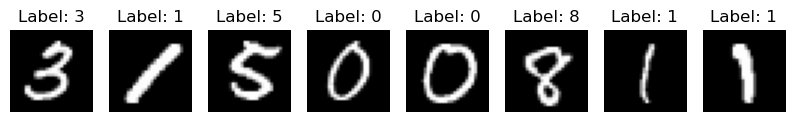

In [25]:
images, labels = next(iter(train_loader))
images = images[:8]
labels = labels[:8]

fig, axes = plt.subplots(1, len(images), figsize=(10, 6))
for ax, img, lab in zip(axes, images, labels):
    ax.imshow(img.squeeze().numpy(), cmap="gray")
    ax.set_title(f"Label: {lab.item()}")
    ax.axis("off")
plt.show()

### prosty CNN

In [26]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        # przypomnijcie sobie co każda warstwa robi i po co ona jest.
        # tu uwaga przy zmianach cyferek - przypomnijcie sobie matematyczne obliczenie. Musi się zgadzać pomiędzy warstwami.
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool  = nn.MaxPool2d(2, 2)
        # eksperymentujcie z wartościami
        self.dropout = nn.Dropout(0.25)
        self.fc1  = nn.Linear(64 * 7 * 7, 128)
        self.fc2  = nn.Linear(128, num_classes)

    def forward(self, x):
      # przypomnij sobie czym jest f. aktywacji ReLU
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

model = SimpleCNN().to(device)

### pętla uczenia z walidacją

In [27]:
from torch.optim import Adam
# jak puścicie tą komórkę i długo się będzie kręcić bez żadnego wyniku na dole to JEST TO NORMALNE
# nie stresujemy się tylko czekamy....

EPOCHS = 5
lr = 1e-3
optimizer = Adam(model.parameters(), lr=lr) # kim jest Adam?
# czym jest cross entropy?
criterion = nn.CrossEntropyLoss()

def run_epoch(loader, train: bool):
  # jak epochy wpływają na wynik?
    epoch_loss, correct, total = 0.0, 0, 0
    if train:
        model.train()
    else:
        model.eval()
    for xb, yb in loader:
        xb, yb = xb.to(device, non_blocking=True), yb.to(device, non_blocking=True)
        if train:
            optimizer.zero_grad()
        with torch.set_grad_enabled(train):
            logits = model(xb)
            loss = criterion(logits, yb)
            if train:
                loss.backward()
                optimizer.step()
        epoch_loss += loss.item() * xb.size(0)
        preds = logits.argmax(1)
        correct += (preds == yb).sum().item()
        total += yb.size(0)
    return epoch_loss / total, correct / total

history = {"train_loss": [], "train_acc": [], "val_loss": [], "val_acc": []}
start = time.time()
for epoch in range(1, EPOCHS+1):
    tr_loss, tr_acc = run_epoch(train_loader, train=True)
    va_loss, va_acc = run_epoch(val_loader, train=False)
    history["train_loss"].append(tr_loss); history["train_acc"].append(tr_acc)
    history["val_loss"].append(va_loss);   history["val_acc"].append(va_acc)
    print(f"Ep {epoch:02d}/{EPOCHS} | train loss {tr_loss:.4f} acc {tr_acc:.4f} | val loss {va_loss:.4f} acc {va_acc:.4f}")
print(f"Czas treningu: {time.time()-start:.1f}s")


Ep 01/5 | train loss 0.2203 acc 0.9318 | val loss 0.0656 acc 0.9818
Ep 02/5 | train loss 0.0672 acc 0.9794 | val loss 0.0552 acc 0.9832
Ep 03/5 | train loss 0.0519 acc 0.9837 | val loss 0.0442 acc 0.9878
Ep 04/5 | train loss 0.0416 acc 0.9870 | val loss 0.0335 acc 0.9912
Ep 05/5 | train loss 0.0356 acc 0.9885 | val loss 0.0387 acc 0.9892
Czas treningu: 190.0s


### monitorowanie przebiegu uczenia

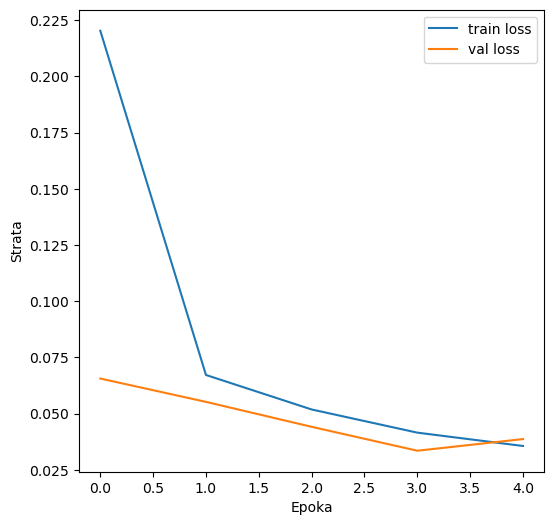

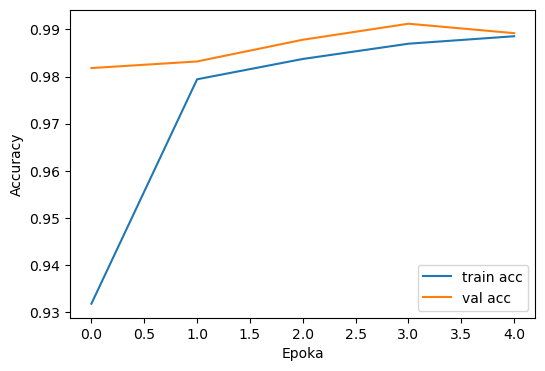

In [28]:
plt.figure(figsize=(6,6))
plt.plot(history["train_loss"], label="train loss")
plt.plot(history["val_loss"], label="val loss")
plt.xlabel("Epoka")
plt.ylabel("Strata")
plt.legend()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(history["train_acc"], label="train acc")
plt.plot(history["val_acc"], label="val acc")
plt.xlabel("Epoka")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### ewaluacja

Test accuracy: 0.9902


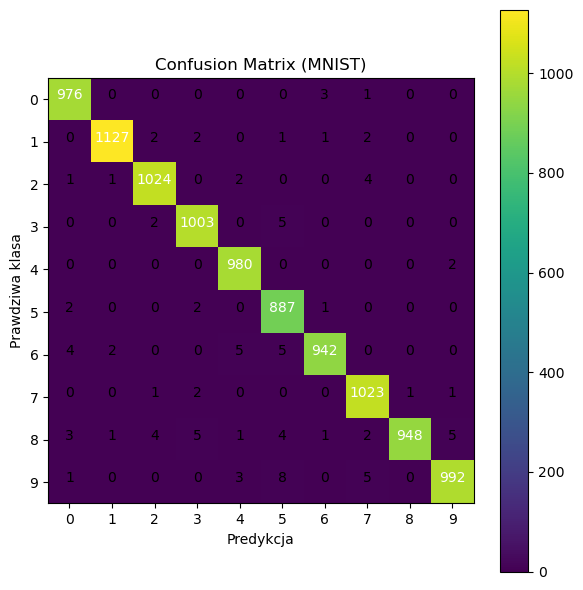

              precision    recall  f1-score   support

           0     0.9889    0.9959    0.9924       980
           1     0.9965    0.9930    0.9947      1135
           2     0.9913    0.9922    0.9918      1032
           3     0.9892    0.9931    0.9911      1010
           4     0.9889    0.9980    0.9934       982
           5     0.9747    0.9944    0.9845       892
           6     0.9937    0.9833    0.9885       958
           7     0.9865    0.9951    0.9908      1028
           8     0.9989    0.9733    0.9860       974
           9     0.9920    0.9832    0.9876      1009

    accuracy                         0.9902     10000
   macro avg     0.9900    0.9901    0.9901     10000
weighted avg     0.9903    0.9902    0.9902     10000



In [29]:
# na teście
# spróbujcie dopisać jakąś własną wizualizację wyników
model.eval()
all_preds, all_targets = [], []
with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device, non_blocking=True)
        logits = model(xb)
        preds = logits.argmax(1).cpu().numpy()
        all_preds.append(preds)
        all_targets.append(yb.numpy())

y_pred = np.concatenate(all_preds)
y_true = np.concatenate(all_targets)

test_acc = (y_pred == y_true).mean()
print(f"Test accuracy: {test_acc:.4f}")


cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix (MNIST)")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Prawdziwa klasa')
plt.xlabel('Predykcja')
plt.tight_layout()
plt.show()

print(classification_report(y_true, y_pred, digits=4))

### wizualizacje predykcji

c:\Users\jastr\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


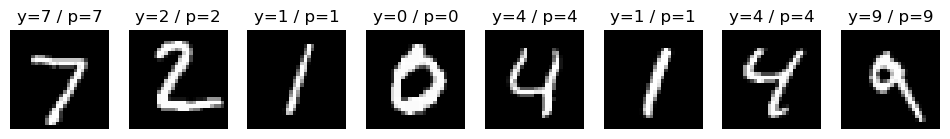

In [30]:
model.eval()
images, labels = next(iter(test_loader))
images, labels = images[:8], labels[:8]
with torch.no_grad():
    logits = model(images.to(device))
preds = logits.argmax(1).cpu()

fig, axes = plt.subplots(1, len(images), figsize=(12, 2.5))
for ax, img, y, p in zip(axes, images, labels, preds):
    ax.imshow(img.squeeze().numpy(), cmap="gray")
    ax.set_title(f"y={y.item()} / p={int(p)}")
    ax.axis("off")
plt.show()

### zapis i ładowanie modelu

In [31]:
save_path = "mnist_cnn.pt"
torch.save(model.state_dict(), save_path)
print(f"Model zapisany do: {os.path.abspath(save_path)}")

# do ładowania odkomentuj poniższe:
# Ładowanie:
# model = SimpleCNN().to(device)
# model.load_state_dict(torch.load(save_path, map_location=device))
# model.eval()

Model zapisany do: c:\Users\jastr\OneDrive\Desktop\ml-wakacyjne-wyzwanie-2025\3_nn&cv\mnist_cnn.pt
